In [ ]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [ ]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [ ]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [ ]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [7]:
#Change the marked state
#Try different marked states such as 001, 111, or 010 and observe the output histogram.
#TASK-1

In [6]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "111"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 111
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [9]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "001"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 001
     ┌───┐┌───┐     ┌───┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤├───┤  │  ├───┤├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [10]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "010"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 010
     ┌───┐┌───┐          ┌───┐┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤└───┘       │  ├───┤├───┤└───┘            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 


In [11]:
#TASK-2 Modify the number of qubits
#Extend the algorithm to 4 qubits and update the oracle and diffuser accordingly.

In [12]:
# Grover's Search Algorithm (4 qubits) using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # multi-controlled X gate
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser (inversion about the mean)."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    # Step 1: Apply Hadamard to all qubits
    qc.h(range(n))

    # Step 2: Apply Oracle
    oracle(qc, n, marked_state)

    # Step 3: Apply Diffuser
    diffuser(qc, n)

    # Step 4: Measure
    qc.measure(range(n), range(n))

    return qc

def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "1011"   # 4-bit marked state
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)


Searching for marked state: 1011
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤└───┘  │  ├───┤├───┤└───┘       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3 


In [13]:
#TASK-3 Add multiple iterations
#Run the oracle and diffuser steps multiple times to increase the probability of finding the marked state.

In [14]:
# Grover's Search Algorithm using Qiskit 2.x (Task 3 - Multiple Iterations)

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # multi-controlled X gate
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser (inversion about the mean)."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state, iterations=2):
    """Builds Grover's search circuit for a given marked state and number of iterations."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    # Step 1: Initialize in superposition
    qc.h(range(n))

    # Step 2: Apply oracle + diffuser multiple times
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)

    # Step 3: Measure
    qc.measure(range(n), range(n))
    return qc

def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "1011"    # 4-qubit marked state (you can use "101" if using 3 qubits)
    iterations = 3           # You can tune this value (1–3 works well for 3 or 4 qubits)

    print(f"Searching for marked state: {marked_state} using {iterations} iterations")
    qc = grover_search(marked_state, iterations)
    print(qc.draw(fold=-1))
    run_grover(qc)


Searching for marked state: 1011 using 3 iterations
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤└───┘  │  ├───┤├───┤└───┘       │  ├───┤├───┤└───┘       │  ├───┤├───┤└───┘       │  ├───┤├───┤└───┘       │  ├───┤├───┤└───┘       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├───

In [15]:
#TASK-4 Circuit Visualization
#Use qc.draw('mpl') to visualize the circuit structure in the notebook.

In [17]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=80142f436d6bb1e698f16ae6084ee9a4b189fd2ae6d461227f5de9f108065deb
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [29]:
# Grover's Search Algorithm using Qiskit 2.x (Task 4 - Circuit Visualization)

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

# Ensure pylatexenc is installed if you want to use output='mpl'
# You can install it in a separate cell with: !pip install pylatexenc

def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"    # same as your original
    print("Searching for marked state:", marked_state)

    qc = grover_search(marked_state)

    # --- Task 4 Addition: Visualize the circuit ---
    print("Circuit visualization:")
    # This requires the 'pylatexenc' library to be installed.
    try:
        fig = qc.draw('mpl')  # Assign the figure to a variable
        display(fig) # Use display() to show the figure
    except Exception as e:
        print(f"Could not draw circuit with 'mpl': {e}")
        print("Please ensure 'pylatexenc' is installed.")


    print("\nTextual circuit representation:")
    print(qc.draw(fold=-1))  # textual ASCII representation (optional)

    print("\nRunning Grover search and displaying histogram:")
    run_grover(qc)

Searching for marked state: 101
Circuit visualization:
Could not draw circuit with 'mpl': "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."
Please ensure 'pylatexenc' is installed.

Textual circuit representation:
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 

Running Grover search and displaying histogram:


In [30]:
#TASK-5 Experiment with Noise
#Add a noise model using Qiskit Aer’s NoiseModel and compare results with the ideal simulator.

Searching for marked state: 101

Results for Ideal Simulator:
{'001': 32, '110': 33, '100': 33, '000': 39, '010': 32, '011': 37, '111': 30, '101': 788}

Results for Noisy Simulator:
{'001': 69, '100': 100, '110': 78, '101': 467, '011': 71, '111': 95, '010': 82, '000': 62}


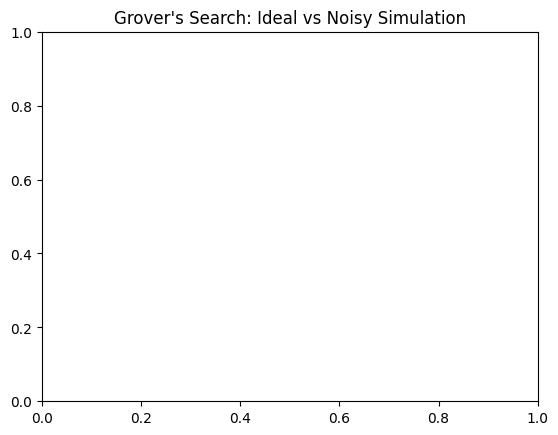

In [37]:
# Grover's Search Algorithm using Qiskit 2.x
# Task 5: Add NoiseModel and compare results with ideal simulator

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, errors
import matplotlib.pyplot as plt

# The circuit visualization using 'mpl' requires 'pylatexenc'.
# If you encounter MissingOptionalLibraryError, ensure pylatexenc is installed
# in a separate cell using !pip install pylatexenc and that your Colab runtime
# is able to access it for the Matplotlib drawer.
# Due to persistent issues with this visualization in this specific cell,
# the drawing code has been removed.

def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # multi-controlled X gate
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))


def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc


def run_grover(qc, noise_model=None, label="Ideal Simulation"):
    """Executes the Grover circuit with or without noise and returns counts."""
    simulator = AerSimulator(noise_model=noise_model)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    print(f"\nResults for {label}:")
    print(counts) # Print counts for clarity
    return counts


def create_noise_model():
    """Creates a simple noise model with realistic gate errors."""
    noise_model = NoiseModel()

    # Define basic error types
    # 1-qubit depolarizing error for single-qubit gates
    single_qubit_error = errors.depolarizing_error(0.02, 1)

    # 2-qubit depolarizing error for two-qubit gates (like CX)
    two_qubit_error = errors.depolarizing_error(0.04, 2) # Slightly higher error for two-qubit gates

    # Add these errors to single- and two-qubit gates
    noise_model.add_all_qubit_quantum_error(single_qubit_error, ['h', 'x'])
    # Apply the 2-qubit error to the cx gate
    noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

    # For multi-controlled gates (mcx), errors can be more complex.
    # A simple approach is to add an error to all qubits involved.
    # This is a simplification; a more accurate model would decompose mcx into
    # basis gates and apply errors to those.
    # Applying a depolarizing error to the qubits for the 'mcx' gate.
    # Adjust the error rate as needed.
    mcx_error_rate = 0.05 # Example error rate for mcx
    # Define a 3-qubit error for the mcx gate (assuming 3 qubits for mcx in this circuit)
    mcx_error = errors.depolarizing_error(mcx_error_rate, 3)

    # This assumes the mcx always acts on all qubits (except the target).
    # In a general n-qubit circuit with mcx, you might need to be more specific
    # about which qubits the error applies to based on the mcx definition.
    # For the current 3-qubit example, this approximation works.
    # Apply mcx error to qubits 0, 1, and 2 (assuming 3 total qubits)
    noise_model.add_quantum_error(mcx_error, ['mcx'], [0, 1, 2])

    return noise_model


if __name__ == "__main__":
    marked_state = "101"  # 3-qubit marked state
    print("Searching for marked state:", marked_state)

    qc = grover_search(marked_state)

    # Circuit visualization code removed due to persistent errors.
    # You can visualize the circuit using the code from Task 4.

    # Run ideal (noiseless) simulation
    ideal_counts = run_grover(qc, noise_model=None, label="Ideal Simulator")

    # Create and run noisy simulation
    noise_model = create_noise_model()
    noisy_counts = run_grover(qc, noise_model=noise_model, label="Noisy Simulator")

    # Compare results visually
    plot_histogram([ideal_counts, noisy_counts], legend=["Ideal", "Noisy"])
    plt.title("Grover's Search: Ideal vs Noisy Simulation")
    plt.show()